<a href="https://colab.research.google.com/github/ysprem/airbnb-santaclara-analysis/blob/main/airbnb_santaclara_county.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [58]:
df_listings = pd.read_csv('/content/gdrive/MyDrive/airbnb_santaclara_dataset/listings.csv')
df_calendar = pd.read_csv('/content/gdrive/MyDrive/airbnb_santaclara_dataset/calendar.csv')
df_neighbourhoods = pd.read_csv('/content/gdrive/MyDrive/airbnb_santaclara_dataset/neighbourhoods.csv')
df_reviews = pd.read_csv('/content/gdrive/MyDrive/airbnb_santaclara_dataset/reviews.csv')

In [6]:
df_listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,11464,Deluxe Studio 5 min. to SC Kaiser & Apple Park,42458,Emey,NaN,Santa Clara,37.34342,-121.98829,Entire home/apt,75,4,8,2021-01-17,0.10,17,149
1,21373,Bonsai Garden Inn in Professorville,7054,Mei Lin,NaN,Palo Alto,37.44001,-122.15667,Private room,80,2,264,2020-03-14,2.02,4,226
2,37512,Private room - Parking 3 carport,161741,Maria,NaN,San Jose,37.30598,-121.84036,Private room,48,1,183,2017-03-14,1.42,2,236
3,52786,Cozy Room in A Quiet Community,161741,Maria,NaN,San Jose,37.30521,-121.84149,Private room,50,1,478,2020-03-11,3.80,2,236
4,62799,Zen Office and Sofa in Palo Alto,7054,Mei Lin,NaN,Palo Alto,37.43925,-122.15617,Private room,100,7,148,2020-03-18,1.81,4,225


In [7]:
df_calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,11464,2021-02-21,f,$75.00,$75.00,4.0,1125.0
1,917723,2021-02-22,t,$100.00,$100.00,1.0,15.0
2,917723,2021-02-23,t,$100.00,$100.00,1.0,15.0
3,917723,2021-02-24,t,$100.00,$100.00,1.0,15.0
4,917723,2021-02-25,t,$100.00,$100.00,1.0,15.0


In [8]:
df_reviews.head()

,listing_id,date
0,11464,2014-06-15
1,11464,2014-12-13
2,11464,2016-08-21
3,11464,2018-07-28
4,11464,2018-08-26


**Which city in Santa Clara county has the most Airbnb listings? Which city has the least number of listings? What type of listings are they? (% of private room listings vs % of entire home listings vs % of shared room listings)**

In [13]:
df_listings.neighbourhood.value_counts()

San Jose                2127
Sunnyvale                556
Santa Clara              554
Palo Alto                537
Mountain View            487
Cupertino                229
Unincorporated Areas     211
Milpitas                 161
Campbell                  94
Los Altos                 67
Los Gatos                 61
Saratoga                  58
Los Altos Hills           34
Morgan Hill               31
Gilroy                    19
Monte Sereno              16
Name: neighbourhood, dtype: int64

In [14]:
df_listings.room_type.value_counts()

Entire home/apt    2719
Private room       2349
Shared room         171
Hotel room            3
Name: room_type, dtype: int64

In [10]:
!pip install pandasql

  Created wheel for pandasql: filename=pandasql-0.7.3-cp37-none-any.whl size=26820 sha256=3a6c1c5f507fa695249d5fee108a29bdfae3b6fdfb615c6419cc833a0cbaa885
  Stored in directory: /root/.cache/pip/wheels/53/6c/18/b87a2e5fa8a82e9c026311de56210b8d1c01846e18a9607fc9
Successfully built pandasql


In [11]:
from pandasql import sqldf

In [38]:
result1 = sqldf("SELECT neighbourhood, num_listings, entire_home*100/num_listings AS entire_home_perc, private_room*100/num_listings AS private_room_perc, shared_room*100/num_listings AS shared_room_perc FROM (SELECT neighbourhood, COUNT(id) AS num_listings, SUM(CASE WHEN room_type LIKE 'Entire home/apt' THEN 1 ELSE 0 END) AS entire_home, SUM(CASE WHEN room_type LIKE 'Private room' THEN 1 ELSE 0 END) AS private_room, SUM(CASE WHEN room_type LIKE 'Shared room' THEN 1 ELSE 0 END) AS shared_room FROM df_listings GROUP BY neighbourhood)")

In [37]:
from google.colab import data_table
data_table.DataTable(result1, include_index=False)

,neighbourhood,num_listings,entire_home_perc,private_room_perc,shared_room_perc
0,Campbell,94,59,38,2
1,Cupertino,229,53,43,3
2,Gilroy,19,10,89,0
3,Los Altos,67,53,40,5
4,Los Altos Hills,34,44,44,11
5,Los Gatos,61,54,45,0
6,Milpitas,161,32,61,5
7,Monte Sereno,16,93,6,0
8,Morgan Hill,31,22,77,0
9,Mountain View,487,69,27,3


In [ ]:
df = pd.DataFrame({'mass': [0.330, 4.87 , 5.97],
                   'radius': [2439.7, 6051.8, 6378.1]},
                  index=['Mercury', 'Venus', 'Earth'])
plot = result1.plot.pie(y='neighbourhood', figsize=(5, 5))
plot = df.plot.pie(subplots=True, figsize=(11, 6))

**Which city has received the most number of reviews from visitors? Which city has received the least? (This correlates with volume of vistors roughly) Which city has the most reviews on average per listing? (This correlates with user engagement on an average for the city, indicating whether the city has high quality or low quality listings)**

In [40]:
result2 = sqldf("SELECT neighbourhood, COUNT(id) AS num_listings, SUM(number_of_reviews) AS num_reviews,  SUM(number_of_reviews)/COUNT(id) AS avg_reviews_per_listing FROM df_listings GROUP BY neighbourhood")
data_table.DataTable(result2, include_index=False)

,neighbourhood,num_listings,num_reviews,avg_reviews_per_listing
0,Campbell,94,3160,33
1,Cupertino,229,5205,22
2,Gilroy,19,336,17
3,Los Altos,67,2066,30
4,Los Altos Hills,34,1589,46
5,Los Gatos,61,2432,39
6,Milpitas,161,3189,19
7,Monte Sereno,16,885,55
8,Morgan Hill,31,446,14
9,Mountain View,487,13985,28


**In which month do we see a spike in reviews during the year?**

In [15]:
import calendar
df_reviews['month'] = pd.DatetimeIndex(df_reviews['date']).month
df_reviews['month_name'] = df_reviews['month'].apply(lambda x: calendar.month_abbr[x])
df_reviews.rename(columns={'listing_id': 'id'}, inplace=True)
df_reviews.sort_values(by=['month'], inplace=True)

In [16]:
df_reviews.head()

,id,date,month,month_name
68404,14697853,2019-01-06,1,Jan
103943,21566372,2021-01-09,1,Jan
103944,21566372,2021-01-11,1,Jan
103945,21566372,2021-01-22,1,Jan
142252,33271915,2020-01-30,1,Jan


In [41]:
result3 = sqldf("SELECT month_name, COUNT(*) AS num_reviews FROM df_reviews GROUP BY month")
data_table.DataTable(result3, include_index=False)

,month_name,num_reviews
0,Jan,13413
1,Feb,12893
2,Mar,12136
3,Apr,9497
4,May,13158
5,Jun,13380
6,Jul,13095
7,Aug,15787
8,Sep,15846
9,Oct,16706


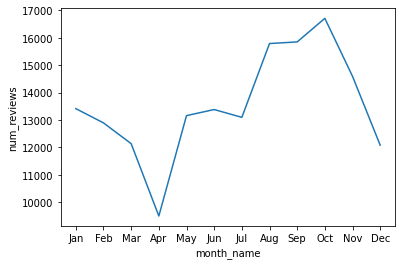

In [20]:
sns.lineplot(data=result3, x='month_name', y='num_reviews')

**Which city has the highest average price and lowest average price? Does it change if we look at median prices?**

In [31]:
result4 = df_listings.groupby('neighbourhood').agg({'price': ['mean', 'median','min', 'max']})

In [32]:
result4.round()

price                 
                       mean median min   max
neighbourhood                               
Campbell              169.0  124.0  25  2000
Cupertino             153.0  111.0  24  3157
Gilroy                153.0   65.0  36  1189
Los Altos             198.0  129.0  28  1000
Los Altos Hills       295.0  145.0  40  3998
Los Gatos             180.0  120.0  39  1000
Milpitas              149.0   85.0   0  2222
Monte Sereno          190.0  134.0  98  1000
Morgan Hill            95.0   80.0  45   180
Mountain View         193.0  136.0  24  1200
Palo Alto             224.0  133.0  29  5000
San Jose              137.0   92.0  14  2000
Santa Clara           162.0  100.0  17  3000
Saratoga              274.0   97.0  37  3400
Sunnyvale             122.0   90.0  24  3000
Unincorporated Areas  251.0  110.0   0  5500

**How many hosts have only 1 listing, how many have more than 1 listing?**

In [53]:
result5 = sqldf("SELECT CASE WHEN num_listings_per_host>1 THEN 'multi_listing_owner' ELSE 'single_listing_owner END AS host_type, SUM(num_hosts) AS num_hosts_per_type FROM (SELECT num_listings AS num_listings_per_host, COUNT(host_id) AS num_hosts FROM (SELECT host_id, COUNT(*) AS num_listings FROM df_listings GROUP BY host_id) GROUP BY num_listings_per_host) GROUP BY host_type")
data_table.DataTable(result5, include_index=False)

,host_type,num_hosts_per_type
0,multi_listing_owner,779
1,single_listing_owner,1772


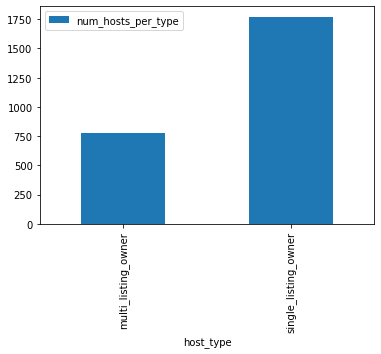

In [68]:
result5.plot.bar(x = 'host_type', y = 'num_hosts_per_type')